Information for the subtraction array:
Dimensions of the matrix: (2267, 2267)
Type of matrix data: int32
Min intensity value: 0
Max intensity value: 194
Mean value: 1.6740749547262277
The image is saved in: C:/Users/sapd/Desktop/X23_0081_Pigment_temp\DCSQI_annealed_40mm_240min_om0_ph10rpm_201223_Sub.tif


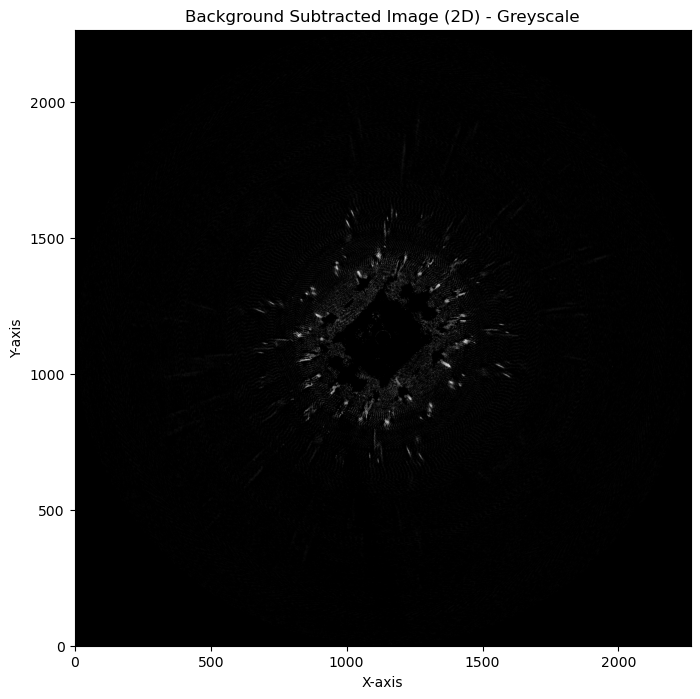

Information for the subtraction array:
Dimensions of the matrix: (2267, 2267)
Type of matrix data: int32
Min intensity value: 0
Max intensity value: 194
Mean value: 1.6740749547262277
The image is saved in: C:/Users/sapd/Desktop/X23_0081_Pigment_temp\DCSQI_annealed_40mm_240min_om0_ph10rpm_201223_Sub.tif


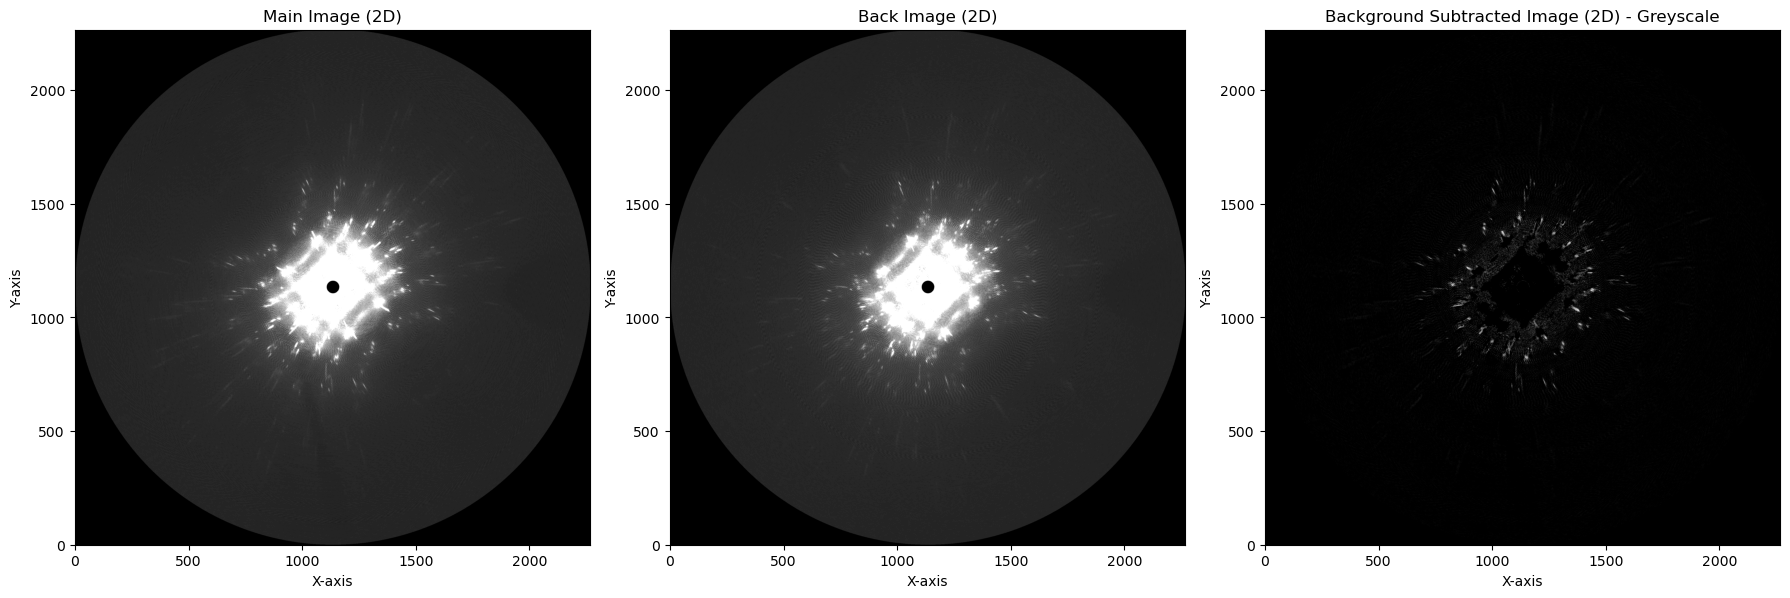

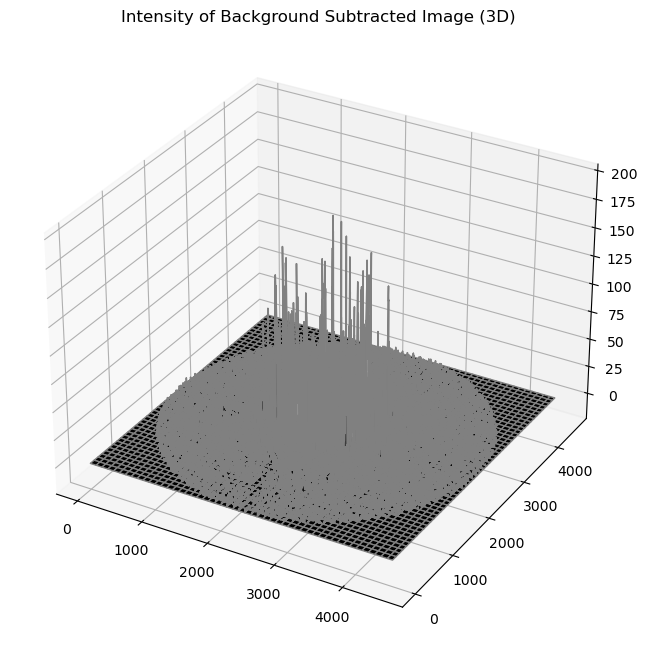

In [38]:
## Image Plate Diffraction System ##

## Background Subtraction for Same Images Size (Version 1.4) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 22.12.2023 ##

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import zoom

# First Class: Load the two images and perform the subtraction depending on the background coefficient value
class BackgroundSubtraction:
    def __init__(self, main_path, back_path, back_coefficient=1.0):
        self.main_path = main_path
        self.back_path = back_path
        self.back_coefficient = back_coefficient
        self.main_array = None
        self.back_array = None

    def load_image(self, path):
        return np.array(Image.open(path).convert('L'))

    def apply_background_subtraction(self):
        main = self.load_image(self.main_path)
        back = self.load_image(self.back_path)

        # Convert into numpy arrays
        self.main_array = main.astype('int32')
        self.back_array = back.astype('int32')

        # Subtraction of the background array-image
        diff = np.clip(self.main_array - self.back_coefficient * self.back_array, 0, self.main_array.max())

        # Information for the subtraction array
        print("Information for the subtraction array:")
        print(f"Dimensions of the matrix: {diff.shape}")
        print(f"Type of matrix data: {diff.dtype}")
        print(f"Min intensity value: {np.min(diff)}")
        print(f"Max intensity value: {np.max(diff)}")
        print(f"Mean value: {np.mean(diff)}")

        # Save the background subtracted image in the same file directory with the main image
        main_dir, main_filename = os.path.split(self.main_path)
        result_path = os.path.join(main_dir, f'{os.path.splitext(main_filename)[0]}_Sub.tif')
        Image.fromarray(diff.astype(np.uint16)).save(result_path)

        print(f'The image is saved in: {result_path}')
        return diff

# Second Class: Display the 2D background subtracted image in grayscale, a multiple plot of main image,
# background image, and background subtracted image, the 3D plot of the background subtracted image pixel intensity 
class ImageLoader:
    def __init__(self, main_image_path, back_image_path, back_coefficient=1.0):
        self.main_image_path = main_image_path
        self.back_image_path = back_image_path
        self.back_coefficient = back_coefficient

    def load_image(self, path):
        # Load the image from the directory and convert it in grey scale
        return np.array(Image.open(path).convert('L'))  

    def display_2d_image(self, image, title):
        
        plt.imshow(image, cmap='gray', origin='lower')
        plt.title(title)
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

    def display_background_subtracted_image(self):
        # Apply background subtraction
        background_subtraction = BackgroundSubtraction(self.main_image_path, self.back_image_path, self.back_coefficient)
        result_diff = background_subtraction.apply_background_subtraction()

        # Display background subtracted image in greyscale
        plt.figure(figsize=(8, 8))
        plt.imshow(result_diff, cmap='gray', origin='lower')
        plt.title('Background Subtracted Image (2D) - Greyscale')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

    def display_3d_intensity(self, result_diff, zoom_factor=1):
        # Increased resolution image using zoom
        high_res_image = zoom(result_diff, zoom_factor)

        # Create arrays with coordinates and intensity values
        x_vals, y_vals = np.meshgrid(np.linspace(0, high_res_image.shape[1] - 1, high_res_image.shape[1]),
                                     np.linspace(0, high_res_image.shape[0] - 1, high_res_image.shape[0]))
        intensity_values = high_res_image.flatten()

        # 3D plot of intensity
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(x_vals, y_vals, high_res_image, cmap='gray', edgecolor='gray')


        plt.title('Intensity of Background Subtracted Image (3D)')
        plt.show()

    def display_main_back_subtracted_images(self, cmap='gray'):
        plt.figure(figsize=(18, 6))

        # Load main image
        main_image = self.load_image(self.main_image_path)
        plt.subplot(1, 3, 1)
        plt.imshow(main_image, cmap=cmap, origin='lower')
        plt.title('Main Image (2D)')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')

        # Load background image
        back_image = self.load_image(self.back_image_path)
        plt.subplot(1, 3, 2)
        plt.imshow(back_image, cmap=cmap, origin='lower')
        plt.title('Back Image (2D)')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')

        # Apply background subtraction again with the same background coefficient
        background_subtraction = BackgroundSubtraction(self.main_image_path, self.back_image_path,
                                                       self.back_coefficient)
        result_diff = background_subtraction.apply_background_subtraction()

        # Display background subtracted image
        plt.subplot(1, 3, 3)
        plt.imshow(result_diff, cmap='gray', origin='lower')
        plt.title('Background Subtracted Image (2D) - Greyscale')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')

        plt.tight_layout()
        plt.show()

        # Display 3D intensity plot
        self.display_3d_intensity(result_diff, zoom_factor=2)

# Type the path of the main image and its background image - need to convert "\" to "/"
main_image_path = 'C:/Users/sapd/Desktop/X23_0081_Pigment_temp/DCSQI_annealed_40mm_240min_om0_ph10rpm_201223.tif'
back_image_path = 'C:/Users/sapd/Desktop/X23_0081_Pigment_temp/Si_40mm_240min_om0_ph10rpm_211223.tif'
back_coefficient_value = 1

# Classes are called automatically       
image_loader = ImageLoader(main_image_path, back_image_path, back_coefficient_value)
image_loader.display_background_subtracted_image()
image_loader.display_main_back_subtracted_images()
